# Part II - Data Science Job Salaries
## by Dennis

## Investigation Overview


> The main take aways of the dataset are that more experienced employees (senior, expert) who work in medium (50-250) or large (>250) sized companies earn the most amount of money. That trend is pretty consistent accross different countries and is not impacted by the ratio of remote work done by the employee.


## Dataset Overview

> I used my own dataset, which I found on Kaggle https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries. The data primarily shows the salaries of employees who work in data science related jobs, comparing them for different experience levels, countries, company sizes, etc. In detail documentation can be found on the Kaggle website.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("ds_salaries.csv", index_col=0)

In [3]:
# convert experience level and company size into ordered categorical types
ordinal_var_dict = {'experience_level': ['EN', 'MI', 'SE', 'EX'],
                    'company_size': ['S', 'M', 'L']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        df[var] = df[var].astype(ordered_var)
    else: # pre-v0.21
        df[var] = df[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

In [4]:
# found here https://stackoverflow.com/questions/579310/formatting-long-numbers-as-strings-in-python
def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

In [5]:
base_color = sns.color_palette()[0]

## Visualization 1

> The following visualization shows the correlation between the employees experience level and their salary. It can be seen that the more experienced an employee is the higher his salary. There is a big range in salaries on every experience level, which can be contributed to the different countries that are being analyzed in the dataset. 

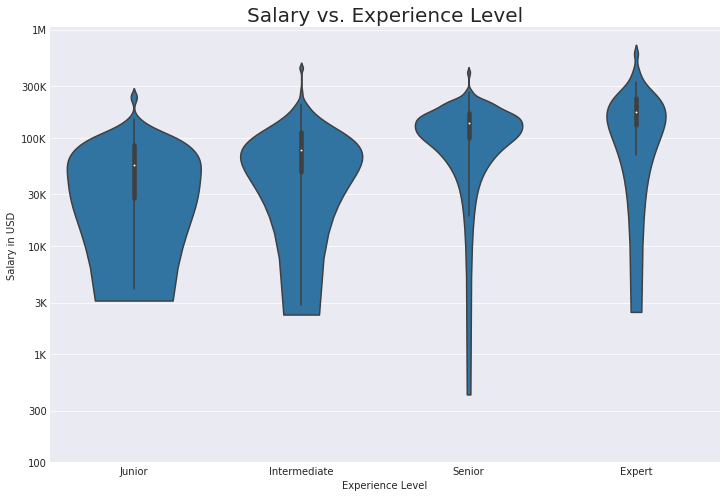

In [62]:
plt.figure(figsize=(12,8))
sns.violinplot(data=df, x="experience_level", y="salary_in_usd", color=base_color)
plt.yscale("log")
ticks = [100, 300, 1000 ,3000, 10000, 30000, 100000, 300000, 1000000]
labels = [human_format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.xticks([0, 1, 2, 3], ["Junior", "Intermediate", "Senior", "Expert"])
plt.xlabel("Experience Level")
plt.ylabel("Salary in USD")
plt.title("Salary vs. Experience Level", fontsize=20);

## Visualization 2

> The following visualization shows the correlation between company size and salary. Interestingly enough medium sized companies on median pay a higher salary than large companies. 

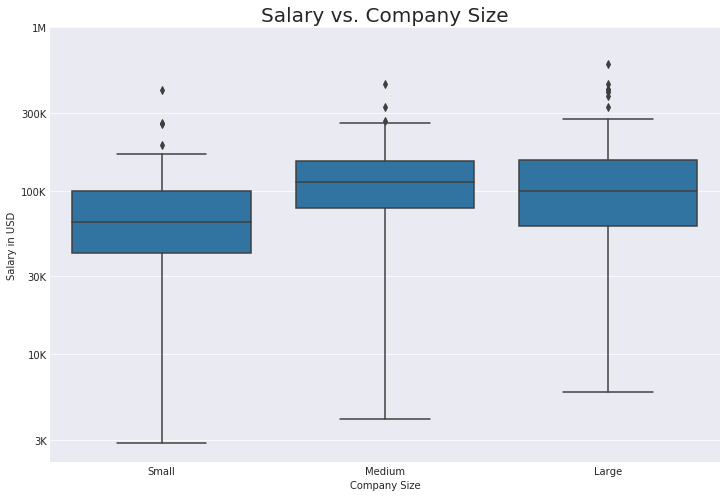

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="company_size", y="salary_in_usd", color=base_color)
plt.yscale("log")
ticks = [3000, 10000, 30000, 100000, 300000, 1000000]
labels = [human_format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.xticks([0,1,2], ["Small", "Medium", "Large"])
plt.xlabel("Company Size")
plt.ylabel("Salary in USD")
plt.title("Salary vs. Company Size", fontsize=20);

## Visualization 3

> The following visualization shows the correlation between experience level, company size and salary. Medium and large sized companies show a positive updwards trend which matches with the last two plots shown. One interesting fact for small sized companies is, that intermediate experienced employees earn less money than junior employees. 

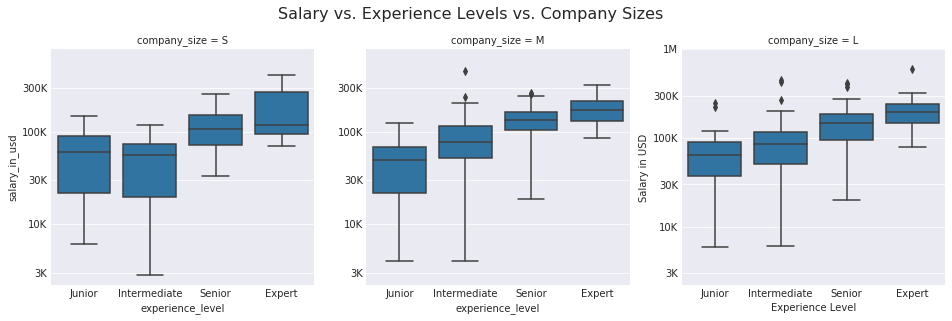

In [58]:
g = sns.FacetGrid(data = df, col = "company_size", size=4.5)
g.map(sns.boxplot, "experience_level", "salary_in_usd")
plt.yscale("log")
ticks = [3000, 10000, 30000, 100000, 300000, 1000000]
labels = [human_format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.xlabel("Experience Level")
plt.ylabel("Salary in USD")
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Salary vs. Experience Levels vs. Company Sizes", fontsize=16)
plt.xticks([0, 1, 2, 3], ["Junior", "Intermediate", "Senior", "Expert"]);

## Visualization 4

> The following visualization shows the correlation between remote ratio, company size and salary. It can be seen that there is a slight positive trend line meaning that remote work also seems to have a positive effect on a employees salary. 

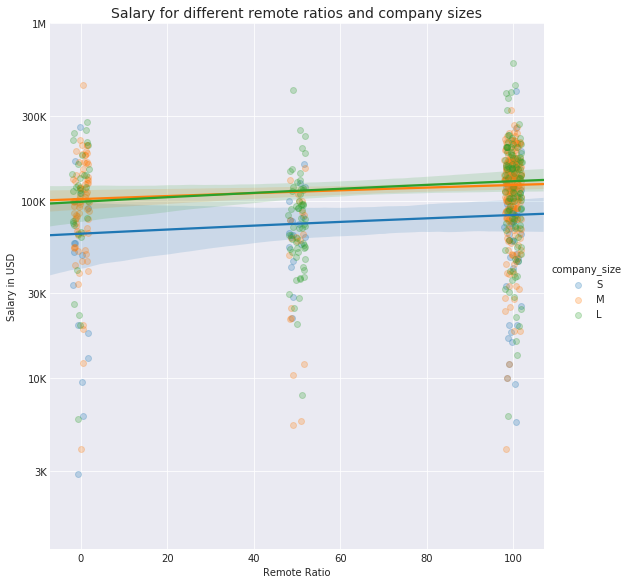

In [56]:
g = sns.FacetGrid(data = df, hue = "company_size", size=8)
g.map(sns.regplot, "remote_ratio", "salary_in_usd", truncate=False, x_jitter=2, scatter_kws={'alpha':1/4})
g.add_legend()
plt.title("Salary for different remote ratios and company sizes", fontsize=14)
plt.yscale("log")
plt.xlabel("Remote Ratio")
plt.ylabel("Salary in USD")
ticks = [3000, 10000, 30000, 100000, 300000, 1000000]
labels = [human_format(v) for v in ticks]
plt.yticks(ticks, labels);